In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
import os

# Use PrettyTensor to simplify Neural Network construction.
import prettytensor as pt

plt.rc('figure', figsize=(10, 7))

In [2]:
tf.__version__

'1.1.0-rc2'

In [3]:
pt.__version__

'0.7.4'

In [4]:
import cifar10
from cifar10 import img_size, num_channels

In [5]:
cifar10.maybe_download_and_extract()

Data has been already downloaded and unpacked


In [6]:
class_names = cifar10.load_class_names()
num_classes = len(class_names)
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [7]:
images_train, cls_train, labels_train = cifar10.load_training_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5


In [8]:
images_test, cls_test, labels_test = cifar10.load_test_data()
print("Size of:")
print("- Training-set:\t\t{}".format(len(images_train)))
print("- Test-set:\t\t{}".format(len(images_test)))

Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch
Size of:
- Training-set:		50000
- Test-set:		10000


In [9]:
# helper function to plot images
def plot_images(images, cls_true, cls_pred=None, smooth=True):
    # some sanity checks on inputs
    assert len(images) == len(cls_true)
    if cls_pred:
        assert len(images) == len(cls_pred)

    # compute plot size. Do not plot more than 100 images
    plt_size = int(np.ceil(np.sqrt(len(images))))
    assert plt_size <= 10
    
    fig, axes = plt.subplots(plt_size, plt_size)
    
    # adjust spacing
    hspace = 0.3 if cls_pred is None else 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    # smoothing
    interpolation = 'spline16' if smooth else 'nearest'

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i, :, :, :], interpolation=interpolation)
        
        cls_true_name = class_names[int(cls_true[i])]
        
        if cls_pred:
            cls_pred_name = class_names[int(cls_pred[i])]
            xlabel = 'True: {0}\nPred: {1}'.format(cls_true_name, cls_pred_name)
        else:
            xlabel = 'True: {0}'.format(cls_true_name)
        
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()

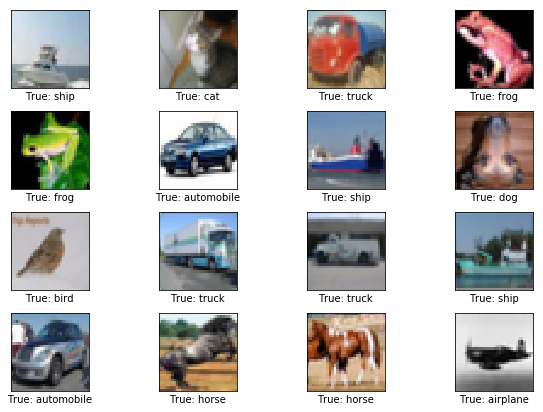

In [10]:
plot_images(images_train[100:116], cls_train[100:116], smooth=False)